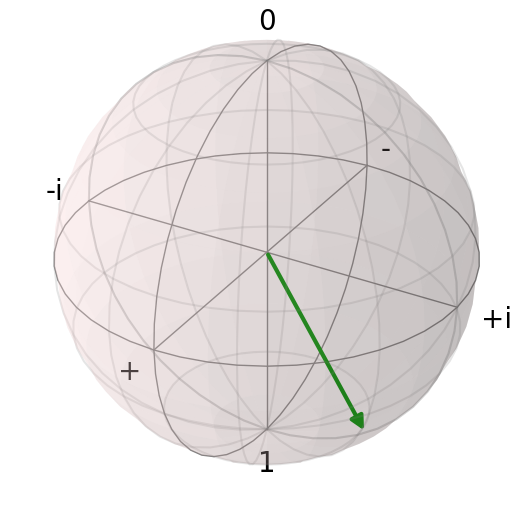

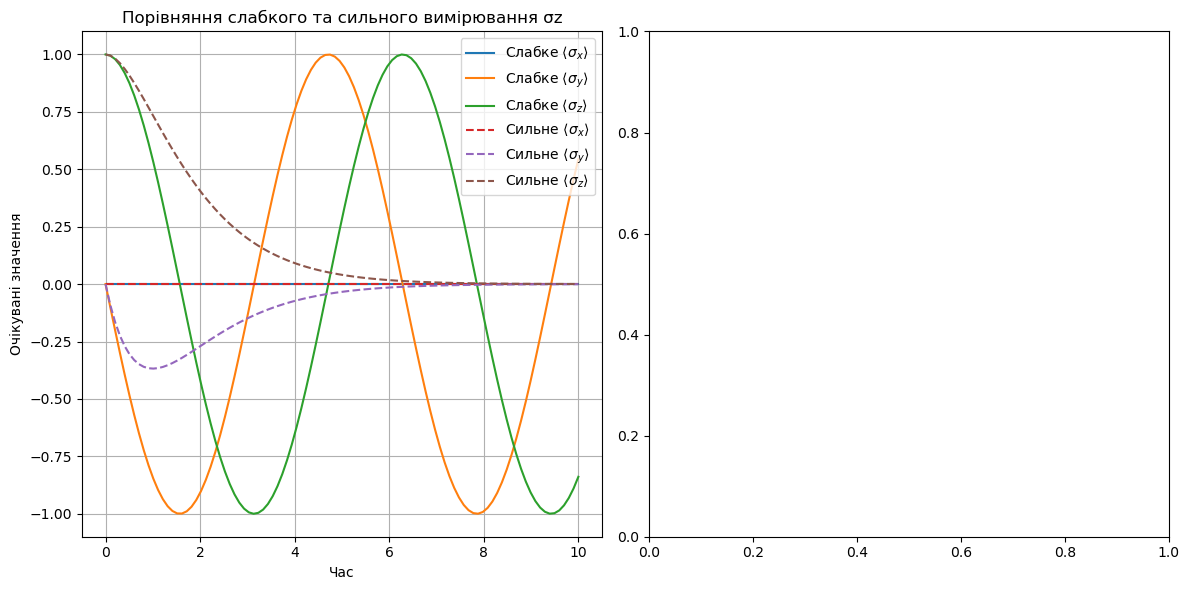

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
from qutip import basis, qeye, tensor, sigmax, sigmay, sigmaz, mesolve, Bloch, Options
import matplotlib.pyplot as plt

def weak_measurement(psi0, H, times, strength, measurement_operator):
    """
    Симулює еволюцію кубіта з урахуванням слабких вимірювань.

    Args:
        psi0: Початковий стан кубіта.
        H: Гамільтоніан системи.
        times: Часовий інтервал симуляції.
        strength: Параметр слабкості вимірювання (0 < strength <= 1).
        measurement_operator: Оператор вимірювання (наприклад, sigmaz, sigmax, sigmay).

    Returns:
        Результат симуляції mesolve.
    """
    M0 = np.sqrt(1 - strength) * qeye(2)
    M1 = np.sqrt(strength) * measurement_operator
    assert (M0.dag() * M0 + M1.dag() * M1).full().all() == qeye(2).full().all(), "Оператори не повні!"

    # Важливо: встановлюємо options для збереження станів
    options = Options(store_states=True)
    return mesolve(H, psi0, times, [M0, M1], [sigmax(), sigmay(), sigmaz()], options=options)

# Початкові параметри
psi0 = basis(2, 0)
H = 0.5 * sigmax()
times = np.linspace(0, 10, 100)
measurement_operator = sigmaz() # Оператор для вимірювання

# Симуляція зі слабким вимірюванням
strength_weak = 0.0
result_weak = weak_measurement(psi0, H, times, strength_weak, measurement_operator)

# Симуляція з сильним вимірюванням (для порівняння)
strength_strong = 1.0 # Сильне вимірювання
result_strong = weak_measurement(psi0, H, times, strength_strong, measurement_operator)

# Візуалізація результатів
plt.figure(figsize=(12, 6))

# Очікувані значення
plt.subplot(1, 2, 1)
plt.plot(times, result_weak.expect[0], label=r'Слабке $\langle \sigma_x \rangle$')
plt.plot(times, result_weak.expect[1], label=r'Слабке $\langle \sigma_y \rangle$')
plt.plot(times, result_weak.expect[2], label=r'Слабке $\langle \sigma_z \rangle$')
plt.plot(times, result_strong.expect[0], '--', label=r'Сильне $\langle \sigma_x \rangle$')
plt.plot(times, result_strong.expect[1], '--', label=r'Сильне $\langle \sigma_y \rangle$')
plt.plot(times, result_strong.expect[2], '--', label=r'Сильне $\langle \sigma_z \rangle$')
plt.title("Порівняння слабкого та сильного вимірювання σz")
plt.xlabel("Час")
plt.ylabel("Очікувані значення")
plt.legend()
plt.grid()

# Сфера Блоха (для останнього стану)
plt.subplot(1, 2, 2)
if len(result_weak.states) > 0:
    b_weak = Bloch() # Створюємо об'єкт Bloch тільки якщо є стани
    b_weak.add_states(result_weak.states[-1])
    b_weak.zlabel = ['0', '1']
    b_weak.xlabel = ['+','-']
    b_weak.ylabel = ['+i','-i']
    b_weak.title = "Стан на сфері Блоха (слабке вимірювання)"
    b_weak.show()
else:
    print("Стани не були збережені. Переконайтесь, що options=Options(store_states=True) передано в mesolve.")
    # Альтернативно: можна відобразити порожню сферу Блоха з поясненням
    b_weak = Bloch()
    b_weak.title = "Стани не збережено"
    b_weak.show()

plt.tight_layout()
plt.show()